In [1]:
import requests


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm


from statsmodels.tsa.filters.hp_filter import hpfilter

BCRP DATA en Diferencias

In [2]:
## Basic parameters
url_base="https://estadisticas.bcrp.gob.pe/estadisticas/series/api/"
formato="/json"
per="/2004-1/2022-6"

## List of variables
series_list = ["PN01728AM", # Producto bruto interno y demanda interna (variaciones porcentuales anualizadas) - PBI
               "PD37965AM", # Indicadores de coyuntura - Electricidad (var% 12 meses)
               "PD37967GM", # Indicadores de coyuntura - Consumo interno de cemento (var% 12 meses)
               "PD37975BM", # Indicadores de coyuntura - Volumen de importación de insumos industriales (var% 12 meses)
               "PN00498MM" # Crédito de las sociedades creadoras de depósito al sector privado - fin de periodo (var% 12 meses) - Crédito MN
              ]

## Empty dictionaries
url = {}
ans = {}
dfs = {}

## Loop to get variables from BCRP Request
for i in range(len(series_list)):
    url[series_list[i]] = url_base+series_list[i]+formato+per
    ans[series_list[i]] = requests.get(url[series_list[i]])
    dfs[series_list[i]] = pd.DataFrame(ans[series_list[i]].json()["periods"])
    dfs[series_list[i]]["values"] = dfs[series_list[i]]["values"].str[0].astype(float)
    
dates = dfs[series_list[i]]["name"]

df_level = pd.concat([dates,
                dfs["PN01728AM"]["values"],
                dfs["PD37965AM"]["values"],
                dfs["PD37967GM"]["values"],
                dfs["PD37975BM"]["values"],
                dfs["PN00498MM"]["values"]],
               axis=1,
               keys=['dates', 'gdp', 'p_elec', 'c_cement', 'm_ind_inp', 'cred_mn'])

df_level

,dates,gdp,p_elec,c_cement,m_ind_inp,cred_mn
0,Ene.2004,3.674966,4.229032,6.868890,-16.532481,13.514563
1,Feb.2004,4.245959,7.350977,6.468289,9.215095,9.453369
2,Mar.2004,5.774257,5.436382,7.780494,-2.812554,8.226966
3,Abr.2004,4.247995,6.194900,2.201965,7.594470,5.003304
4,May.2004,3.950757,6.124446,2.770659,19.005229,4.772573
...,...,...,...,...,...,...
215,Dic.2021,1.890000,2.269244,-0.273046,7.085252,5.583341
216,Ene.2022,2.880000,2.776339,-1.595114,6.572178,7.782628
217,Feb.2022,4.880000,4.017273,1.890000,8.096785,7.507242
218,Mar.2022,3.790000,2.156735,3.490000,NaN,7.637134


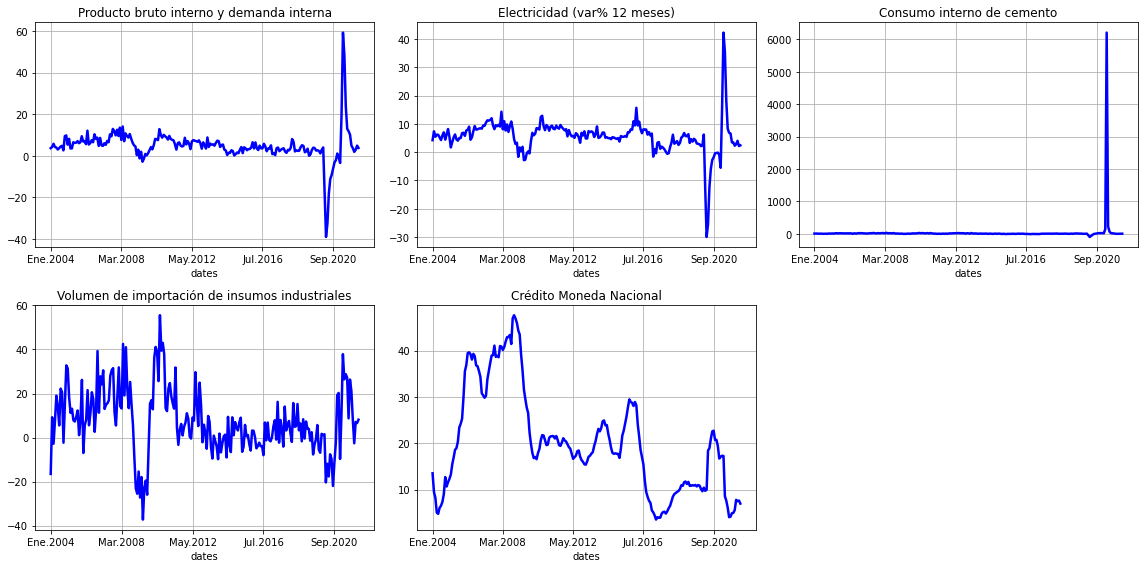

In [3]:
fig, axis = plt.subplots(nrows = 2,
                         ncols = 3,
                         figsize = (16,8))

var_names = ["Producto bruto interno y demanda interna",
             "Electricidad (var% 12 meses)",
             "Consumo interno de cemento",
             "Volumen de importación de insumos industriales",
             "Crédito Moneda Nacional"]

# Loop for subplot
idx = 1

for i in range(2):
    for j in range (3):
        
        # if idx is minor to number of elements
        if idx <= len(df_level.columns) - 1:
            ax = axis[i][j]
            df_level.plot(x = "dates",
                        y = df_level.columns[idx],
                        ax = ax,
                        color = 'blue',
                        linewidth=2.5,
                        legend = False)
            
            ax.set_title(var_names[idx-1])
            ax.grid(which='major')
            idx = idx + 1
            
        # if idx is major to number of elements        
        else:        
            axis[i,j].axis('off')
            idx = idx + 1
            
fig.tight_layout()

#plt.savefig(r".\images\er_variables.png", bbox_inches='tight')
#plt.savefig(r".\images\er_variables.eps", bbox_inches='tight')

BCRP DATA en Niveles

In [4]:
               "PN38070GM", # Empleo en Lima Metropolitana - Promedio móvil tres meses (miles de personas) - Ingreso Mensual
               "PN01142MM", # Bolsa de Valores de Lima - Índices Bursátiles - Índice General BVL (base 31/12/91 = 100)
 

('PN01142MM',)

FRED DATA